**Hola amiguitos de yiutu. Voy a hacer un analisis de la relacion entre los tipos de productos y sus categorias a ver cuales son los mas capos**

**Importo las bibliotecas necesarias padreee**

In [3]:
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.cm as cm
import matplotlib as mpl
import random

**Creo el data frame en base al csv**

In [ ]:
cmap = cm.get_cmap('viridis')
saltos = np.linspace(0.2, 1, 15)
colores = cmap(saltos)

In [7]:
Entrenamiento = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Archivos para leer /tp0 y tp1/Entrenamieto_ECI_2020.csv')
Entrenamiento.head()

,ID,Region,Territory,"Pricing, Delivery_Terms_Quote_Appr","Pricing, Delivery_Terms_Approved",Bureaucratic_Code_0_Approval,Bureaucratic_Code_0_Approved,Submitted_for_Approval,Bureaucratic_Code,Account_Created_Date,Source,Billing_Country,Account_Name,Opportunity_Name,Opportunity_ID,Sales_Contract_No,Account_Owner,Opportunity_Owner,Account_Type,Opportunity_Type,Quote_Type,Delivery_Terms,Opportunity_Created_Date,Brand,Product_Type,Size,Product_Category_B,Price,Currency,Last_Activity,Quote_Expiry_Date,Last_Modified_Date,Last_Modified_By,Product_Family,Product_Name,ASP_Currency,ASP,ASP_(converted)_Currency,ASP_(converted),Planned_Delivery_Start_Date,Planned_Delivery_End_Date,Month,Delivery_Quarter,Delivery_Year,Actual_Delivery_Date,TRF,Total_Amount_Currency,Total_Amount,Total_Taxable_Amount_Currency,Total_Taxable_Amount,Stage,Prod_Category_A
0,27761,EMEA,None,1,1,1,1,0,Bureaucratic_Code_4,6/16/2015,None,Netherlands,Account_Name_619,Opportunity_Name_12598,0,None,Person_Name_51,Person_Name_18,Account_Type_2,Opportunity_Type_1,Non Binding,Delivery_Terms_2,12/7/2015,None,None,None,None,None,None,NaT,1/30/2016,6/13/2016,Person_Name_18,Product_Family_77,Product_Name_99,EUR,0.52,USD,0.58817,5/1/2016,6/30/2016,2016 - 5,Q2,2016,NaT,10,EUR,5272800.0,EUR,5272800.0,Closed Lost,Prod_Category_A_None
1,27760,EMEA,None,0,0,0,0,0,Bureaucratic_Code_4,6/16/2015,None,Netherlands,Account_Name_619,Opportunity_Name_12600,1,39,Person_Name_51,Person_Name_20,Account_Type_2,Opportunity_Type_1,Non Binding,Delivery_Terms_2,12/7/2015,None,None,None,None,None,None,NaT,1/20/2016,1/15/2016,Person_Name_20,Product_Family_77,Product_Name_100,EUR,0.53,USD,0.59948,1/18/2016,1/20/2016,2016 - 1,Q1,2016,NaT,0,EUR,48230.0,EUR,48230.0,Closed Won,Prod_Category_A_None
2,27446,Americas,NW America,0,0,0,0,0,Bureaucratic_Code_4,4/21/2015,Source_7,United States,Account_Name_1794,Opportunity_Name_469,2,760,Person_Name_64,Person_Name_8,Account_Type_5,Opportunity_Type_1,Non Binding,Delivery_Terms_4,12/8/2015,None,None,None,None,None,None,NaT,9/30/2016,9/29/2016,Person_Name_8,Product_Family_81,Product_Name_91,USD,0.48,USD,0.48000,1/25/2016,1/25/2016,2016 - 1,Q1,2016,NaT,0,USD,83865.6,USD,83865.6,Closed Won,Prod_Category_A_None
3,16808,Americas,NW America,1,0,1,0,0,Bureaucratic_Code_5,7/27/2013,Source_11,United States,Account_Name_1201,Opportunity_Name_415,3,None,Person_Name_8,Person_Name_8,Account_Type_5,Opportunity_Type_19,Non Binding,Delivery_Terms_1,12/8/2015,Other,Product_Type_0,Size_4,Product_Category_B_16,0.42,USD,NaT,NaT,3/27/2018,Person_Name_8,Product_Family_209,Product_Name_432,USD,0.53,USD,0.53000,2/1/2018,3/31/2018,2018 - 2,Q1,2018,NaT,14,USD,7421881.5,USD,7421881.5,Closed Lost,Prod_Category_A_None
4,16805,Americas,NW America,1,0,1,0,0,Bureaucratic_Code_5,7/27/2013,Source_11,United States,Account_Name_1201,Opportunity_Name_851,4,None,Person_Name_8,Person_Name_8,Account_Type_5,Opportunity_Type_19,Non Binding,Delivery_Terms_1,12/8/2015,Other,Product_Type_0,Size_4,Product_Category_B_16,0.42,USD,NaT,6/2/2017,3/27/2018,Person_Name_8,Product_Family_209,Product_Name_432,USD,0.53,USD,0.53000,2/1/2018,2/28/2018,2018 - 2,Q1,2018,NaT,25,USD,13357192.5,USD,13357192.5,Closed Lost,Prod_Category_A_None


In [ ]:
#Filas y Columnas del df
print(Entrenamiento.shape)

(16947, 52)


**Saco las columnas que sean irrelevantes para mi analisis y me quedo con las que voy a utilizar.
Los datos que voy a utilizar son los siguientes:** 

En qué meses de los distintos años tuvieron la mayor cantidad de ventas y sobre qué tipo de productos (categorías)


Product_Family: familia de producto (Categórica).

Product_Name: nombre del producto (Categórica).

Product_Type: tipo de producto (Categórica).

Month: mes-año de Planned_Delivery_Start_Date (Fecha).

Delivery_Quarter: trimestre de Planned_Delivery_Start_Date (Categorica).

Delivery_Year: año de Planned_Delivery_Start_Date (Fecha).

Opportunity_Created_Date : fecha de creación de la oportunidad comercial
(Datetime).

Product_Category_B : categoría 'B' del producto (Categórica).

Prod_Category_A : categoría 'A' del producto (Categórica).


# **Tipos de productos Especificados**


In [8]:
Productos = Entrenamiento[['Product_Type','Product_Name','Product_Family','Product_Category_B','Prod_Category_A']] # Se podria relacionar tambien el peso y el tamaño 


In [ ]:
#Analizo los tipos de dato que tiene mi DataFrame y si tiene nulls o no
Productos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16947 entries, 0 to 16946
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Product_Type        16947 non-null  object
 1   Product_Name        16947 non-null  object
 2   Product_Family      16947 non-null  object
 3   Product_Category_B  16947 non-null  object
 4   Prod_Category_A     16947 non-null  object
dtypes: object(5)
memory usage: 662.1+ KB


Modifico el tipo de dato del dia


In [ ]:
#Chequeo la info del Df
Productos.describe(include = 'all')


,Product_Type,Product_Name,Product_Family,Product_Category_B,Prod_Category_A
count,16947,16947,16947,16947,16947
unique,7,456,227,28,1
top,None,Product_Name_100,Product_Family_77,None,Prod_Category_A_None
freq,15935,976,1345,15928,16947


Como tengo tipos de productos no especificicados, los voy a renombrar.

In [ ]:
Productos.fillna('No_especificado')
Productos.replace('None', 'No_especificado', inplace = True)
Productos.head()

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4389: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


,Product_Type,Product_Name,Product_Family,Product_Category_B,Prod_Category_A
0,No_especificado,Product_Name_99,Product_Family_77,No_especificado,Prod_Category_A_None
1,No_especificado,Product_Name_100,Product_Family_77,No_especificado,Prod_Category_A_None
2,No_especificado,Product_Name_91,Product_Family_81,No_especificado,Prod_Category_A_None
3,Product_Type_0,Product_Name_432,Product_Family_209,Product_Category_B_16,Prod_Category_A_None
4,Product_Type_0,Product_Name_432,Product_Family_209,Product_Category_B_16,Prod_Category_A_None


In [ ]:
Productos['Product_Type'].value_counts()

No_especificado    15935
Other                515
Product_Type_3       179
Product_Type_1       142
Product_Type_0        94
Product_Type_4        73
Product_Type_2         9
Name: Product_Type, dtype: int64

Saco los tipos de producto no especificados y me quedo con aquellos  que si voy a utilizar para mi analisis. Que son aquellos que tienen un tipo designado. Luego voy a analizar a los casos que tengan el tipo de producto no especificado


In [ ]:
Productos_especificados = Productos[(Productos['Product_Type'] != 'No_especificado') & (Productos['Product_Type'] != 'Other')]
Productos_especificados

,Product_Type,Product_Name,Product_Family,Product_Category_B,Prod_Category_A
3,Product_Type_0,Product_Name_432,Product_Family_209,Product_Category_B_16,Prod_Category_A_None
4,Product_Type_0,Product_Name_432,Product_Family_209,Product_Category_B_16,Prod_Category_A_None
5,Product_Type_0,Product_Name_432,Product_Family_209,Product_Category_B_16,Prod_Category_A_None
956,Product_Type_4,Product_Name_204,Product_Family_128,Product_Category_B_4,Prod_Category_A_None
1357,Product_Type_3,Product_Name_231,Product_Family_132,No_especificado,Prod_Category_A_None
...,...,...,...,...,...
16055,Product_Type_1,Product_Name_246,Product_Family_139,Product_Category_B_9,Prod_Category_A_None
16060,Product_Type_1,Product_Name_488,Product_Family_224,Product_Category_B_23,Prod_Category_A_None
16061,Product_Type_1,Product_Name_483,Product_Family_223,Product_Category_B_23,Prod_Category_A_None
16104,Product_Type_2,Product_Name_221,Product_Family_133,Product_Category_B_14,Prod_Category_A_None


In [ ]:
Productos_especificados['Product_Type'].count() #497 productos dentro de tipos de productos especificados

497

Grafico los Tipos de Productos para ver cuales son los que más destacan

Text(0.5, 1.0, 'Cantidad de productos por tipo de productos especificados')

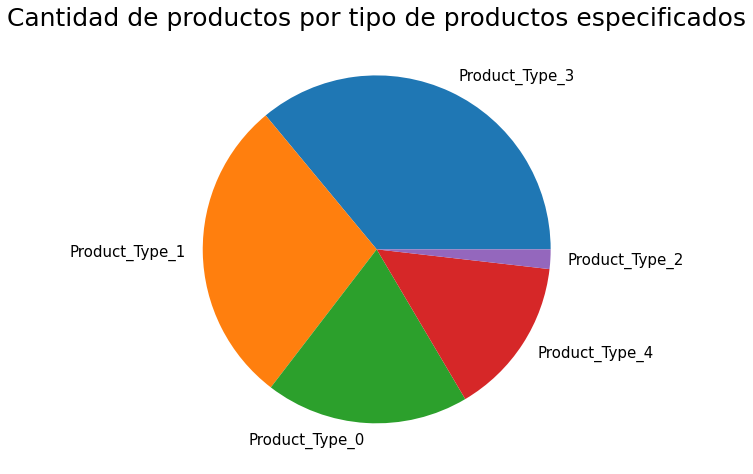

In [ ]:
Grafico_cantidad_tipo_de_productos = Productos_especificados['Product_Type'].value_counts().plot.pie(fontsize= 15 ,figsize=(8, 8))
Grafico_cantidad_tipo_de_productos.set_ylabel("")
Grafico_cantidad_tipo_de_productos.set_title('Cantidad de productos por tipo de productos especificados',fontsize= 25 )

Luego de ver el gráfico se ve claramente que el tipo de producto que existe en mayor cantidad dentro de nuestras oportunidades es "Other", luego "Product_Type_3" y bla bla lba

Ahora veo que onda los productos de estos tipos de productos

In [ ]:
Nombre_productos = Productos_especificados['Product_Name']
texto = Nombre_productos.to_string()
type(texto)

str

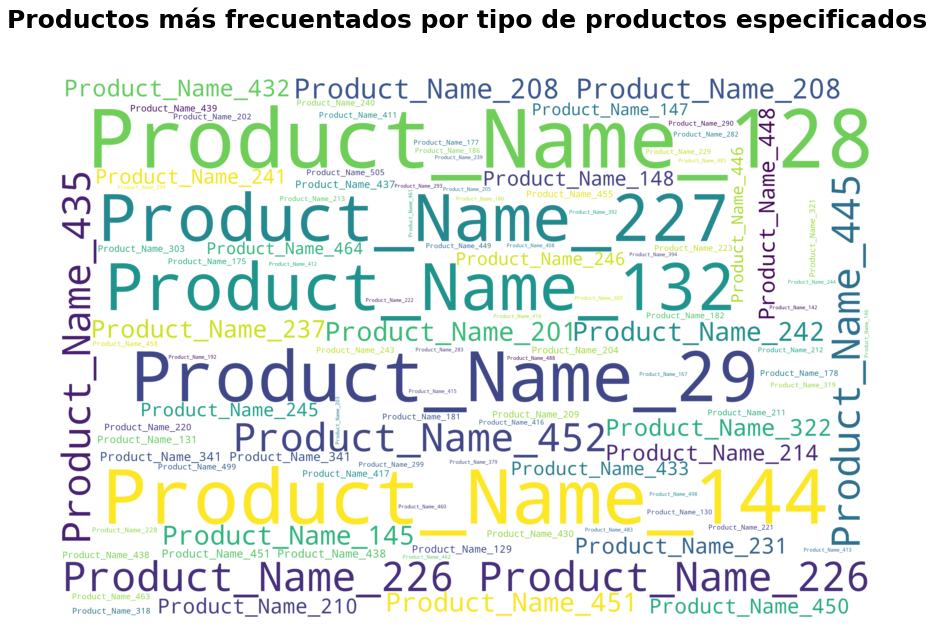

In [ ]:
wordcloud = WordCloud(background_color = 'white', width = 3000,
    height = 2000,colormap = 'viridis').generate(texto)

fig = plt.figure(figsize = (20, 10), facecolor = 'w', edgecolor = 'w')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.title('Productos más frecuentados por tipo de productos especificados', fontweight = 'bold',  fontsize = 25, pad = 50.0)

plt.show()

Estos fueron los nombres de los productos más frecuentado, dentro de los tipos de productos especificados

Agrupo por tipo de producto, hago un count y grafico en barras la cantidad de productos por tipo 

In [ ]:
Productos_por_tipo = Productos_especificados.groupby(['Product_Type']).agg({'Product_Name':'count'})
Productos_por_tipo = Productos_por_tipo.reset_index()
Productos_por_tipo = Productos_por_tipo.rename(columns = {'Product_Name' : 'Cantidad_productos_por_tipo'})
Productos_por_tipo.head()

,Product_Type,Cantidad_productos_por_tipo
0,Product_Type_0,94
1,Product_Type_1,142
2,Product_Type_2,9
3,Product_Type_3,179
4,Product_Type_4,73


In [ ]:
Productos_por_tipo.set_index('Product_Type',inplace = True)

Text(0.5, 1.0, 'Cantidad de productos por tipo de producto especificado')

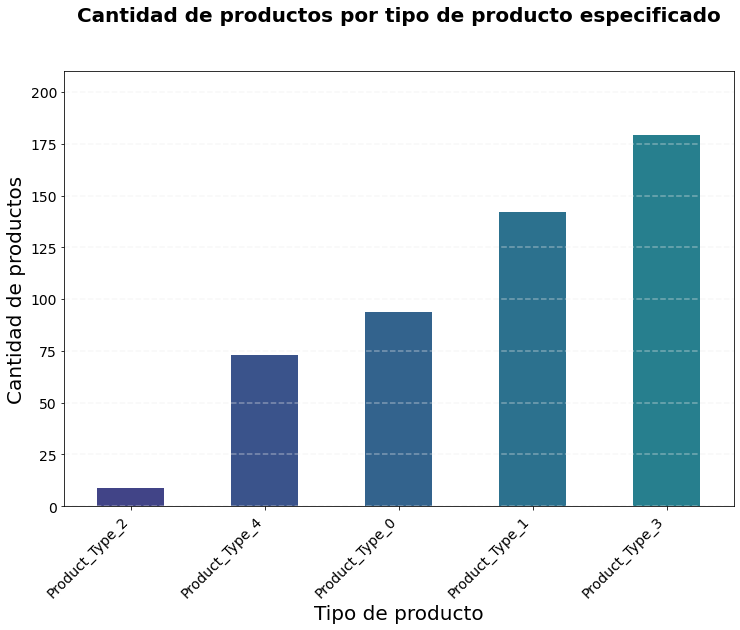

In [ ]:
Tipo_de_producto_ordenado = Productos_por_tipo['Cantidad_productos_por_tipo'].sort_values().plot.bar(color = colores, figsize = (12,8),fontsize = 14)
plt.xlabel('Tipo de producto', fontsize = 20)
plt.xticks(rotation=45, ha='right')
lineas = Tipo_de_producto_ordenado.get_yticks()
for i in lineas:
      Tipo_de_producto_ordenado.axhline(y=i, linestyle='--', alpha=0.4, color='#eeeeee')
plt.ylabel('Cantidad de productos', fontsize = 20) 
plt.title('Cantidad de productos por tipo de producto especificado', fontweight = 'heavy',  fontsize = 20, pad = 50.0)

En base a los productos espcificados voy a analizar las distintas subcategorias

In [ ]:
Productos_por_familia = Productos_especificados.groupby(['Product_Family']).agg({'Product_Name':'count'})
Productos_por_familia = Productos_por_familia.reset_index()
Productos_por_familia = Productos_por_familia.rename(columns = {'Product_Name' : 'Cantidad_productos_por_familia'})
Productos_por_familia.head()

,Product_Family,Cantidad_productos_por_familia
0,Product_Family_100,48
1,Product_Family_103,1
2,Product_Family_109,44
3,Product_Family_115,1
4,Product_Family_116,1


In [ ]:
Productos_por_familia.set_index('Product_Family',inplace = True)

Text(0.5, 1.0, 'Top 10 mayor cantidad de productos por familia en tipos de productos especificados')

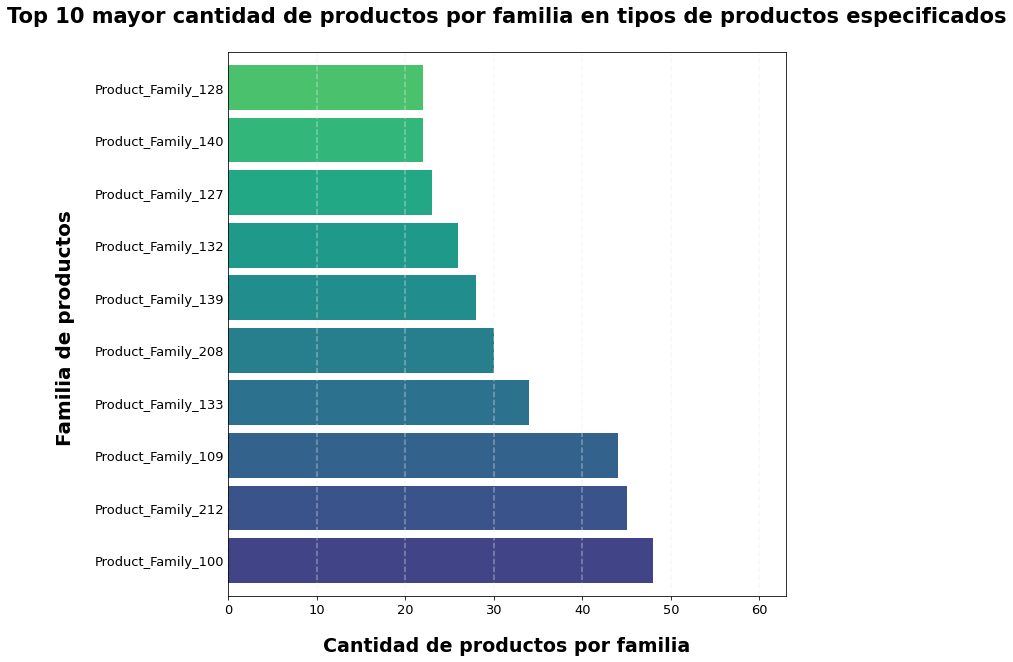

In [ ]:
Top_10_product_family = Productos_por_familia['Cantidad_productos_por_familia'].sort_values().nlargest(10).plot(kind='barh', figsize=(10,10), color=colores, width=0.85,fontsize = 13)
plt.tick_params(axis='y', length=0)
lineas = Top_10_product_family.get_xticks()
for i in lineas:
      Top_10_product_family.axvline(x=i, linestyle='--', alpha=0.4, color='#eeeeee')

Top_10_product_family.set_xlabel("Cantidad de productos por familia", labelpad=20, weight='bold', size=19)
Top_10_product_family.set_ylabel("Familia de productos ", labelpad=20, weight='bold', size=20)

plt.title("Top 10 mayor cantidad de productos por familia en tipos de productos especificados", weight='bold', size=21, pad=30)

# **Categoria A y Categoria B Especifica3**

Filtro de nuevo aquellos productos de la categoria B que tengan una categoria definida

In [ ]:
Productos_especificados_categoria_b = Productos_especificados[['Product_Type','Product_Name','Product_Category_B','Product_Family']]
Productos_especificados_categoria_b.head()

,Product_Type,Product_Name,Product_Category_B,Product_Family
3,Product_Type_0,Product_Name_432,Product_Category_B_16,Product_Family_209
4,Product_Type_0,Product_Name_432,Product_Category_B_16,Product_Family_209
5,Product_Type_0,Product_Name_432,Product_Category_B_16,Product_Family_209
956,Product_Type_4,Product_Name_204,Product_Category_B_4,Product_Family_128
1357,Product_Type_3,Product_Name_231,No_especificado,Product_Family_132


In [ ]:
Productos_especificados_categoria_b.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 497 entries, 3 to 16132
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Product_Type        497 non-null    object
 1   Product_Name        497 non-null    object
 2   Product_Category_B  497 non-null    object
 3   Product_Family      497 non-null    object
dtypes: object(4)
memory usage: 19.4+ KB


In [ ]:
Productos_especificados_categoria_b_especificada = Productos_especificados_categoria_b[(Productos_especificados_categoria_b['Product_Category_B'] != 'No_especificado') & (Productos_especificados_categoria_b['Product_Category_B'] != 'Other')]

In [ ]:
Productos_especificados_categoria_b_especificada.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 460 entries, 3 to 16132
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Product_Type        460 non-null    object
 1   Product_Name        460 non-null    object
 2   Product_Category_B  460 non-null    object
 3   Product_Family      460 non-null    object
dtypes: object(4)
memory usage: 18.0+ KB


In [ ]:
Productos_especificados_categoria_b_especificada.head()

,Product_Type,Product_Name,Product_Category_B,Product_Family
3,Product_Type_0,Product_Name_432,Product_Category_B_16,Product_Family_209
4,Product_Type_0,Product_Name_432,Product_Category_B_16,Product_Family_209
5,Product_Type_0,Product_Name_432,Product_Category_B_16,Product_Family_209
956,Product_Type_4,Product_Name_204,Product_Category_B_4,Product_Family_128
1760,Product_Type_0,Product_Name_223,Product_Category_B_14,Product_Family_133


In [ ]:
Cantidad_productos_por_categoria_b =Productos_especificados_categoria_b_especificada.groupby('Product_Category_B').agg({'Product_Family':'count'})

In [ ]:
Cantidad_productos_por_categoria_b = Cantidad_productos_por_categoria_b.rename(columns = {'Product_Family' : 'Cantidad_productos_por_categoria_b'})

In [ ]:
Cantidad_productos_por_categoria_b.head()

,Cantidad_productos_por_categoria_b
Product_Category_B,
Product_Category_B_0,3
Product_Category_B_1,23
Product_Category_B_10,3
Product_Category_B_11,20
Product_Category_B_12,50


Text(0.5, 1.0, 'Top 10 mayor cantidad de productos por categoria B en tipos de productos especificados')

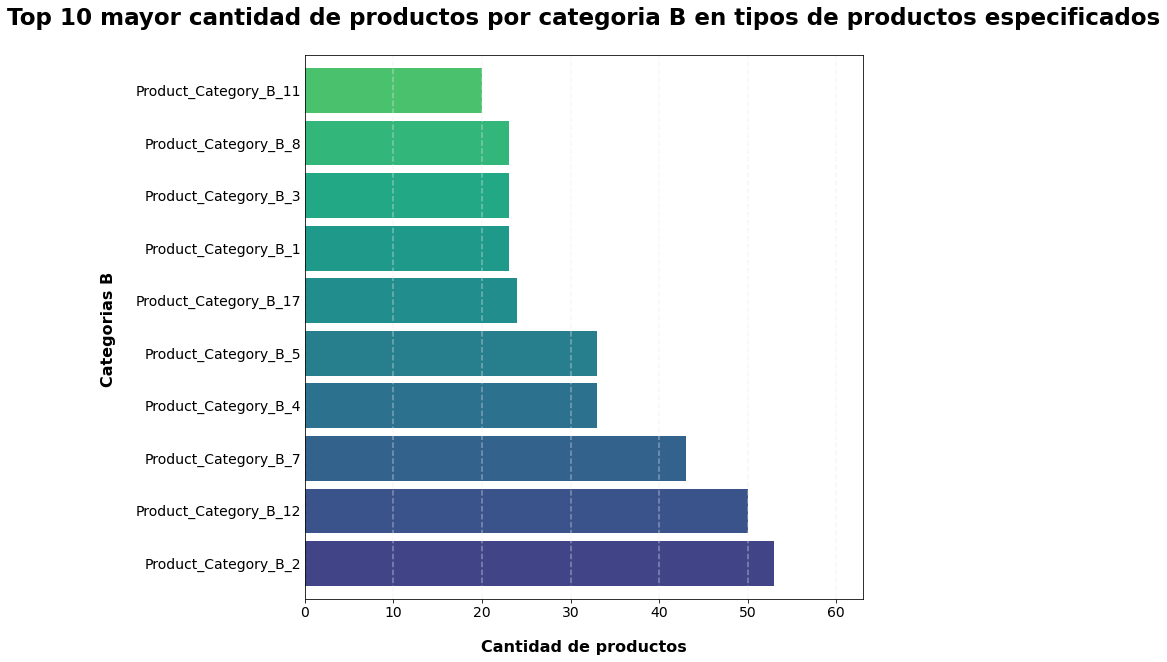

In [ ]:
Top_10_cantidad_productos_por_categoria_b = Cantidad_productos_por_categoria_b['Cantidad_productos_por_categoria_b'].sort_values().nlargest(10).plot(kind='barh', figsize=(10,10), color=colores, width=0.85,fontsize = 14)
plt.tick_params(axis='y', length=0)
lineas = Top_10_cantidad_productos_por_categoria_b.get_xticks()
for i in lineas:
      Top_10_cantidad_productos_por_categoria_b.axvline(x=i, linestyle='--', alpha=0.4, color='#eeeeee')

Top_10_cantidad_productos_por_categoria_b.set_xlabel("Cantidad de productos", labelpad=20, weight='bold', size=16)
Top_10_cantidad_productos_por_categoria_b.set_ylabel("Categorias B ", labelpad=20, weight='bold', size=16)

plt.title("Top 10 mayor cantidad de productos por categoria B en tipos de productos especificados", weight='bold', size=23, pad=30)

Bajaron la cantidad de productos ya que no habia productos con la categoria b Especificada

**NO ESPECIFICADOS DENTRO DE LA CATEGORIA B**


In [ ]:
Productos_especificados_categoria_b_no_especificado = Productos_especificados_categoria_b[(Productos_especificados_categoria_b['Product_Category_B'] == 'No_especificado') | (Productos_especificados_categoria_b['Product_Category_B'] == 'Other')]

In [ ]:
Productos_especificados_categoria_b_no_especificado.head()

,Product_Type,Product_Name,Product_Category_B,Product_Family
1357,Product_Type_3,Product_Name_231,No_especificado,Product_Family_132
4830,Product_Type_2,Product_Name_245,Other,Product_Family_139
4831,Product_Type_2,Product_Name_245,Other,Product_Family_139
8021,Product_Type_3,Product_Name_430,Other,Product_Family_209
8356,Product_Type_3,Product_Name_445,Other,Product_Family_213


In [ ]:
Categoria_b_no_especificada = Productos_especificados_categoria_b_no_especificado.groupby('Product_Category_B').agg({'Product_Type' : 'count'})
Categoria_b_no_especificada.head()

,Product_Type
Product_Category_B,
No_especificado,2
Other,35


Text(0.5, 1.0, 'Cantidad de productos en categorias b no especificadas ')

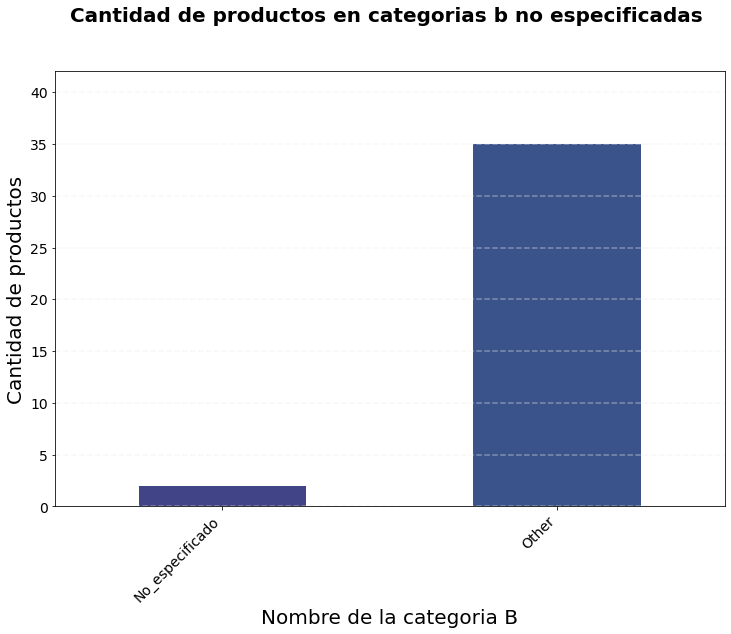

In [ ]:
Grafico_Categoria_b_no_especificada = Categoria_b_no_especificada['Product_Type'].sort_values().plot.bar(color = colores, figsize = (12,8),fontsize = 14)
plt.xlabel('Nombre de la categoria B', fontsize = 20)
plt.xticks(rotation=45, ha='right')
lineas = Grafico_Categoria_b_no_especificada.get_yticks()
for i in lineas:
      Grafico_Categoria_b_no_especificada.axhline(y=i, linestyle='--', alpha=0.4, color='#eeeeee')
plt.ylabel('Cantidad de productos', fontsize = 20) 
plt.title('Cantidad de productos en categorias b no especificadas ', fontweight = 'heavy',  fontsize = 20, pad = 50.0)

No son muchos productos, pero está bueno separarlos dentro del analisis que hicimos

**Categoria A**

In [ ]:
Productos_especificados_categoria_a = Productos_especificados[['Product_Type','Prod_Category_A']]

In [ ]:
Productos_especificados_categoria_a.head()

,Product_Type,Prod_Category_A
3,Product_Type_0,Prod_Category_A_None
4,Product_Type_0,Prod_Category_A_None
5,Product_Type_0,Prod_Category_A_None
956,Product_Type_4,Prod_Category_A_None
1357,Product_Type_3,Prod_Category_A_None


In [ ]:
Productos_especificados_categoria_a_especificada = Productos_especificados_categoria_a[(Productos_especificados_categoria_a['Prod_Category_A'] != 'Prod_Category_A_None')]

In [ ]:
Productos_especificados_categoria_a_especificada.head()

,Product_Type,Prod_Category_A


No hay otra categoria a que no sea Prod_Category_A_none

In [ ]:
Categoria_a_no_especificada = Productos_especificados_categoria_a.groupby('Prod_Category_A').agg({'Product_Type' : 'count'})
Categoria_a_no_especificada.head()

,Product_Type
Prod_Category_A,
Prod_Category_A_None,497


Text(0.5, 1.0, 'Cantidad de productos en categorias a')

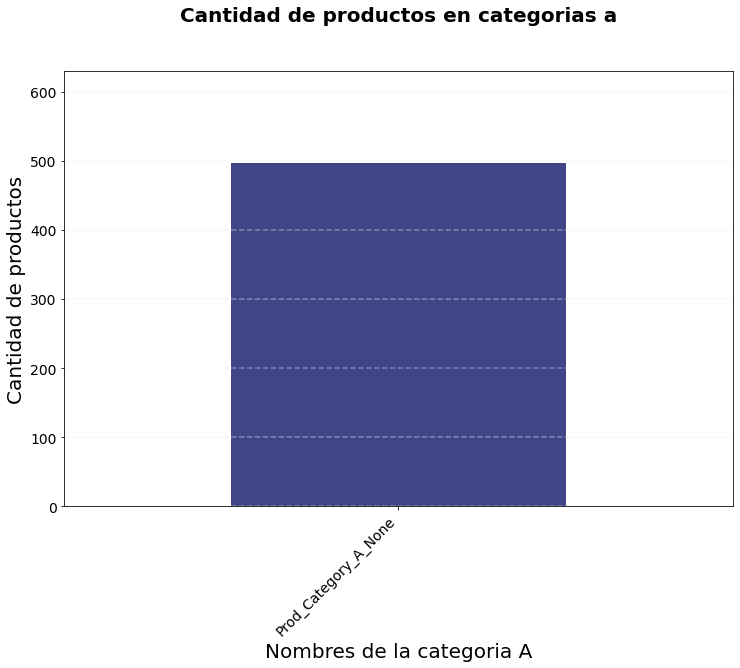

In [ ]:
Grafico_Categoria_a_no_especificada = Categoria_a_no_especificada['Product_Type'].plot.bar(color = colores, figsize = (12,8),fontsize = 14)
plt.xlabel('Nombres de la categoria A', fontsize = 20)
plt.xticks(rotation=45, ha='right')
lineas = Grafico_Categoria_a_no_especificada.get_yticks()
for i in lineas:
      Grafico_Categoria_a_no_especificada.axhline(y=i, linestyle='--', alpha=0.4, color='#eeeeee')
plt.ylabel('Cantidad de productos', fontsize = 20) 
plt.title('Cantidad de productos en categorias a', fontweight = 'heavy',  fontsize = 20, pad = 50.0)

NO EXISTE OTRA CATEGORIA A QUE NO SEA NONE. Es la única categoria A que existe dentro de los tipo de productos especificados 

# **Tipos de productos No especificados**

In [4]:
cmap = cm.get_cmap('inferno')
saltos = np.linspace(0.2, 1, 15)
colores = cmap(saltos)

In [9]:
Productos_no_especificados = Productos[(Productos['Product_Type'] == 'No_especificado') | (Productos['Product_Type'] == 'Other')]
Productos_no_especificados['Product_Type'].value_counts()

Other    515
Name: Product_Type, dtype: int64

Text(0.5, 1.0, 'Cantidad de productos por Tipo de productos (no especificado)')

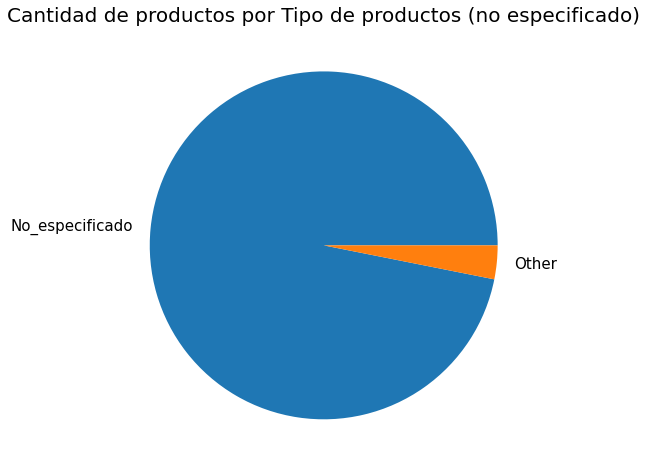

In [ ]:
Grafico_cantidad_tipo_de_productos_no_especificados = Productos_no_especificados['Product_Type'].value_counts().plot.pie(fontsize= 15 ,figsize=(8, 8))
Grafico_cantidad_tipo_de_productos_no_especificados.set_ylabel("")
Grafico_cantidad_tipo_de_productos_no_especificados.set_title('Cantidad de productos por Tipo de productos (no especificado)',fontsize= 20 )

In [ ]:
Nombre_productos = Productos_no_especificados['Product_Name']
texto = Nombre_productos.to_string()
type(texto)

str

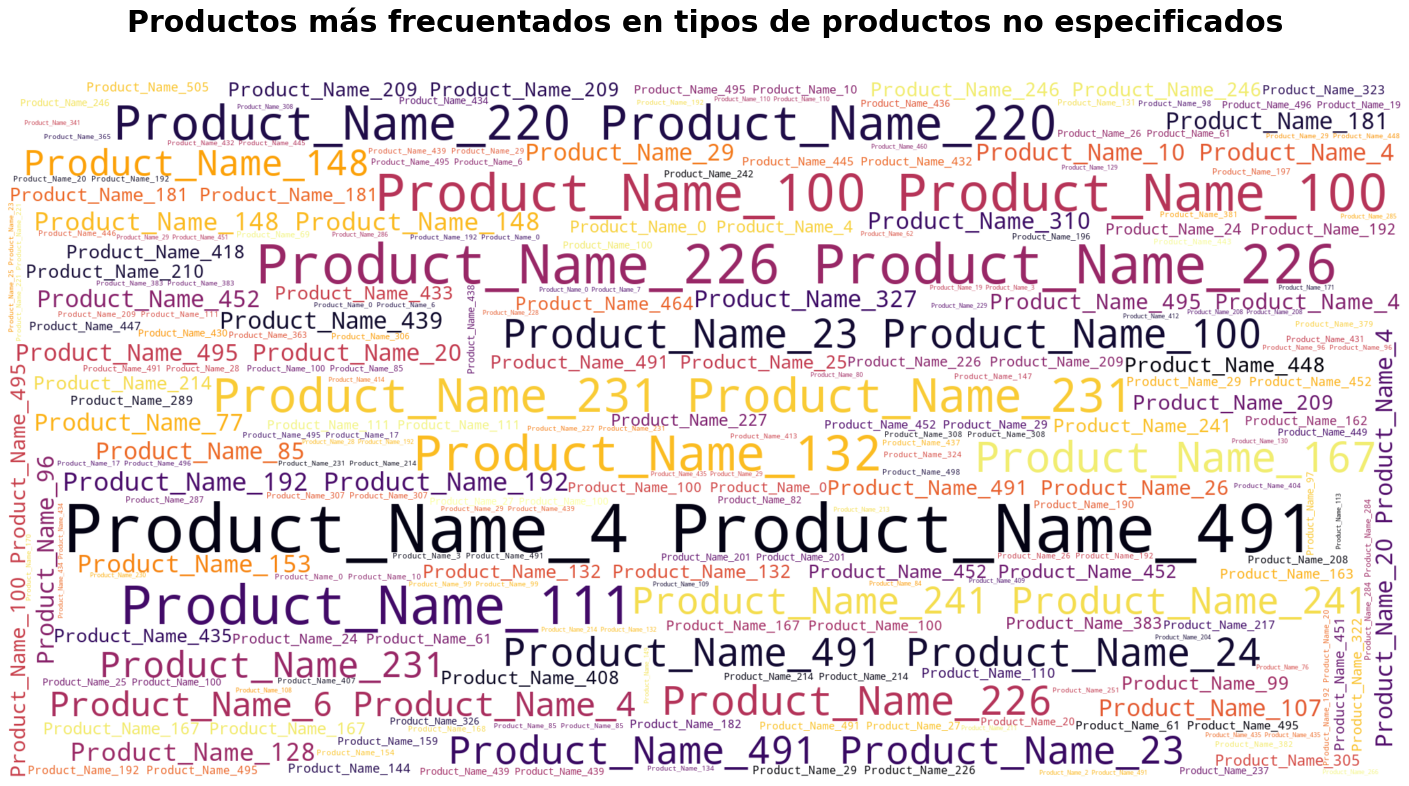

In [ ]:
wordcloud = WordCloud(background_color = 'white', width = 2000,
    height = 1000,colormap = 'inferno').generate(texto)
fig = plt.figure(figsize = (25, 15), facecolor = 'w', edgecolor = 'w')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.title('Productos más frecuentados en tipos de productos no especificados', fontweight = 'bold',  fontsize = 30, pad = 50.0)
plt.show()

In [ ]:
Productos_por_tipo = Productos_no_especificados.groupby(['Product_Type']).agg({'Product_Name':'count'})
Productos_por_tipo = Productos_por_tipo.reset_index()
Productos_por_tipo = Productos_por_tipo.rename(columns = {'Product_Name' : 'Cantidad_productos_por_tipo'})
Productos_por_tipo.head()

,Product_Type,Cantidad_productos_por_tipo
0,No_especificado,15935
1,Other,515


In [ ]:
Productos_por_tipo.set_index('Product_Type',inplace = True)

Text(0.5, 1.0, 'Cantidad de productos por tipo de producto no especificado')

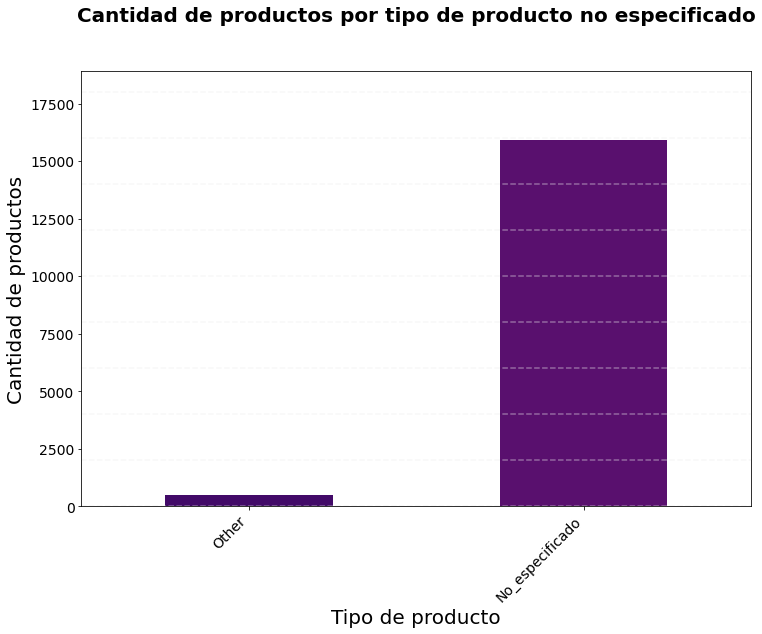

In [ ]:
Tipo_de_producto_ordenado = Productos_por_tipo['Cantidad_productos_por_tipo'].sort_values().plot.bar(color = colores, figsize = (12,8),fontsize = 14)
plt.xlabel('Tipo de producto', fontsize = 20)
plt.xticks(rotation=45, ha='right')
lineas = Tipo_de_producto_ordenado.get_yticks()
for i in lineas:
      Tipo_de_producto_ordenado.axhline(y=i, linestyle='--', alpha=0.4, color='#eeeeee')
plt.ylabel('Cantidad de productos', fontsize = 20) 
plt.title('Cantidad de productos por tipo de producto no especificado', fontweight = 'heavy',  fontsize = 20, pad = 50.0)

In [ ]:
Productos_por_familia_no_especificado = Productos_no_especificados.groupby(['Product_Family']).agg({'Product_Name':'count'})
Productos_por_familia_no_especificado = Productos_por_familia_no_especificado.reset_index()
Productos_por_familia_no_especificado = Productos_por_familia_no_especificado.rename(columns = {'Product_Name' : 'Cantidad_productos_por_familia'})
Productos_por_familia_no_especificado.head()

,Product_Family,Cantidad_productos_por_familia
0,Product_Family_0,165
1,Product_Family_1,13
2,Product_Family_10,116
3,Product_Family_100,571
4,Product_Family_101,19


In [ ]:
Productos_por_familia_no_especificado.set_index('Product_Family',inplace = True)

Text(0.5, 1.0, 'Top 10 mayor cantidad de productos por familia en tipos de productos no especificados')

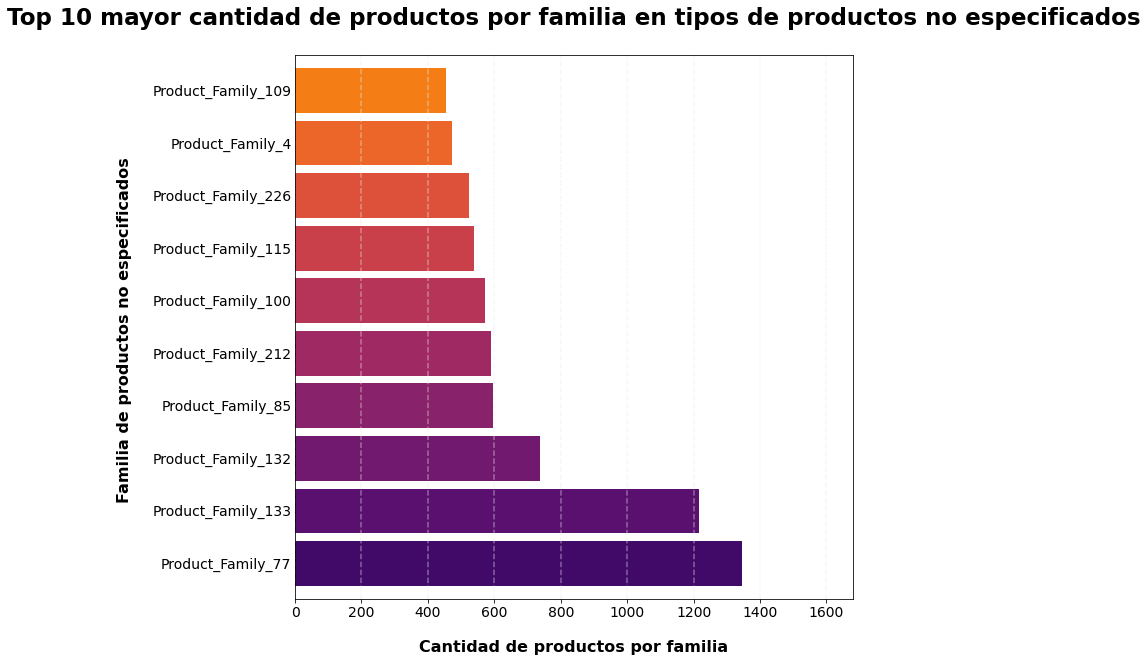

In [ ]:
Top_10_product_family = Productos_por_familia_no_especificado['Cantidad_productos_por_familia'].sort_values().nlargest(10).plot(kind='barh', figsize=(10,10), color=colores, width=0.85,fontsize = 14)
plt.tick_params(axis='y', length=0)
lineas = Top_10_product_family.get_xticks()
for i in lineas:
      Top_10_product_family.axvline(x=i, linestyle='--', alpha=0.4, color='#eeeeee')

Top_10_product_family.set_xlabel("Cantidad de productos por familia", labelpad=20, weight='bold', size=16)
Top_10_product_family.set_ylabel("Familia de productos no especificados ", labelpad=20, weight='bold', size=16)

plt.title("Top 10 mayor cantidad de productos por familia en tipos de productos no especificados", weight='bold', size=23, pad=30)

# **Categoria A y Categoria B No Especifica3**

In [10]:
Productos_no_especificados_categoria_b = Productos_no_especificados[['Product_Type','Product_Name','Product_Category_B','Product_Family']]
Productos_no_especificados_categoria_b.head()

,Product_Type,Product_Name,Product_Category_B,Product_Family
579,Other,Product_Name_192,Other,Product_Family_115
580,Other,Product_Name_100,Other,Product_Family_77
586,Other,Product_Name_231,Other,Product_Family_132
932,Other,Product_Name_231,Other,Product_Family_132
1480,Other,Product_Name_340,Other,Product_Family_173


In [11]:
Productos_no_especificados_categoria_b.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 515 entries, 579 to 16042
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Product_Type        515 non-null    object
 1   Product_Name        515 non-null    object
 2   Product_Category_B  515 non-null    object
 3   Product_Family      515 non-null    object
dtypes: object(4)
memory usage: 20.1+ KB


In [32]:
#Primero analizo los que tienen categoria b especificada dentro de los productos con tipo no especificados
Productos_no_especificados_categoria_b_especificada = Productos_no_especificados_categoria_b[(Productos_no_especificados_categoria_b['Product_Category_B'] != 'No_especificado') & (Productos_no_especificados_categoria_b['Product_Category_B'] != 'Other') & (Productos_no_especificados_categoria_b['Product_Category_B'] != 'None')]

In [33]:
Productos_no_especificados_categoria_b_especificada.head()

,Product_Type,Product_Name,Product_Category_B,Product_Family
4826,Other,Product_Name_245,Product_Category_B_27,Product_Family_139
8284,Other,Product_Name_210,Product_Category_B_2,Product_Family_127
10571,Other,Product_Name_449,Product_Category_B_11,Product_Family_212
11678,Other,Product_Name_131,Product_Category_B_2,Product_Family_100
11825,Other,Product_Name_145,Product_Category_B_2,Product_Family_109


In [34]:
Cantidad_productos_por_categoria_b_por_product_type_no_especificado = Productos_no_especificados_categoria_b_especificada.groupby('Product_Category_B').agg({'Product_Family':'count'})

In [35]:
Cantidad_productos_por_categoria_b_por_product_type_no_especificado = Cantidad_productos_por_categoria_b_por_product_type_no_especificado.rename(columns = {'Product_Family' : 'Cantidad_productos_por_categoria_b'})

In [38]:
Cantidad_productos_por_categoria_b_por_product_type_no_especificado.head()

,Cantidad_productos_por_categoria_b
Product_Category_B,
Product_Category_B_11,1
Product_Category_B_12,1
Product_Category_B_13,1
Product_Category_B_14,2
Product_Category_B_15,1


Text(0.5, 1.0, 'Top 10 mayor cantidad de productos por categoria b en tipos de productos no especificados')

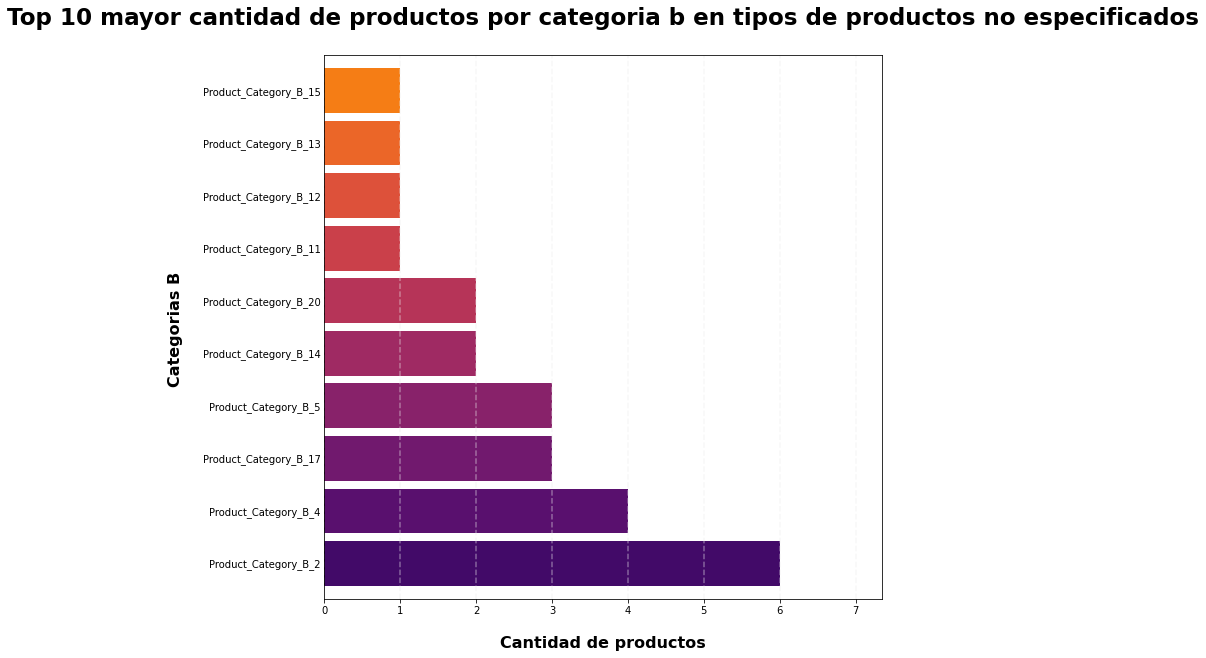

In [37]:
Top_10_Cantidad_productos_por_categoria_b_por_product_type_no_especificado = Cantidad_productos_por_categoria_b_por_product_type_no_especificado['Cantidad_productos_por_categoria_b'].nlargest(10).plot(kind='barh', figsize=(10,10), color=colores, width=0.85)
plt.tick_params(axis='y', length=0)
lineas = Top_10_Cantidad_productos_por_categoria_b_por_product_type_no_especificado.get_xticks()
for i in lineas:
      Top_10_Cantidad_productos_por_categoria_b_por_product_type_no_especificado.axvline(x=i, linestyle='--', alpha=0.4, color='#eeeeee')

Top_10_Cantidad_productos_por_categoria_b_por_product_type_no_especificado.set_xlabel("Cantidad de productos", labelpad=20, weight='bold', size=16)
Top_10_Cantidad_productos_por_categoria_b_por_product_type_no_especificado.set_ylabel("Categorias B ", labelpad=20, weight='bold', size=16)

plt.title("Top 10 mayor cantidad de productos por categoria b en tipos de productos no especificados", weight='bold', size=23, pad=30)

Claramente podemos ver que el data frame es una poronga y los datos no especificados nos hacen la cola U W U


In [ ]:
Productos_no_especificados_categoria_b_no_especificado = Productos_no_especificados_categoria_b[(Productos_no_especificados_categoria_b['Product_Category_B'] == 'No_especificado') | (Productos_no_especificados_categoria_b['Product_Category_B'] == 'Other')]

In [ ]:
Productos_no_especificados_categoria_b_no_especificado.head()

,Product_Type,Product_Name,Product_Category_B,Product_Family
0,No_especificado,Product_Name_99,No_especificado,Product_Family_77
1,No_especificado,Product_Name_100,No_especificado,Product_Family_77
2,No_especificado,Product_Name_91,No_especificado,Product_Family_81
6,No_especificado,Product_Name_308,No_especificado,Product_Family_164
7,No_especificado,Product_Name_251,No_especificado,Product_Family_143


In [ ]:
Categoria_b_no_especificada_en_prod_no_especificados = Productos_no_especificados_categoria_b_no_especificado.groupby('Product_Category_B').agg({'Product_Type' : 'count'})
Categoria_b_no_especificada_en_prod_no_especificados.head()

,Product_Type
Product_Category_B,
No_especificado,15926
Other,488


Text(0.5, 1.0, 'Cantidad de productos en categorias b no especificadas en tipos de productos no especificados')

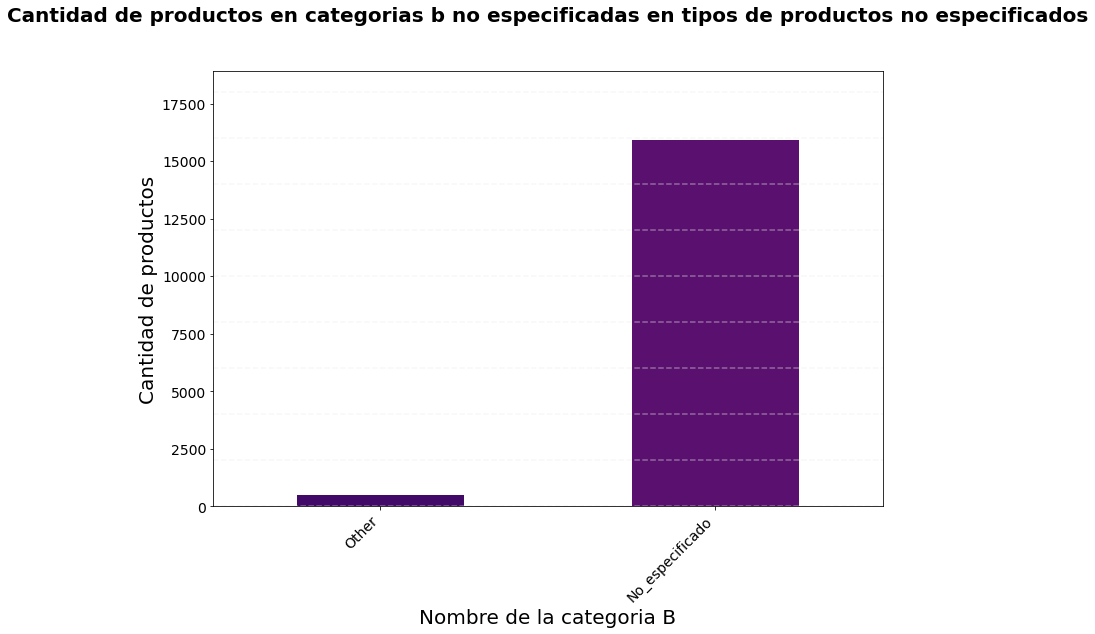

In [ ]:
Grafico_Categoria_b_no_especificada_en_prod_no_especificados = Categoria_b_no_especificada_en_prod_no_especificados['Product_Type'].sort_values().plot.bar(color = colores, figsize = (12,8),fontsize = 14)
plt.xlabel('Nombre de la categoria B', fontsize = 20)
plt.xticks(rotation=45, ha='right')
lineas = Grafico_Categoria_b_no_especificada_en_prod_no_especificados.get_yticks()
for i in lineas:
      Grafico_Categoria_b_no_especificada_en_prod_no_especificados.axhline(y=i, linestyle='--', alpha=0.4, color='#eeeeee')
plt.ylabel('Cantidad de productos', fontsize = 20) 
plt.title('Cantidad de productos en categorias b no especificadas en tipos de productos no especificados', fontweight = 'heavy',  fontsize = 20, pad = 50.0)

In [ ]:
Productos_no_especificados_categoria_a = Productos_no_especificados[['Product_Type','Prod_Category_A']]

In [ ]:
Productos_no_especificados_categoria_a.head()

,Product_Type,Prod_Category_A
0,No_especificado,Prod_Category_A_None
1,No_especificado,Prod_Category_A_None
2,No_especificado,Prod_Category_A_None
6,No_especificado,Prod_Category_A_None
7,No_especificado,Prod_Category_A_None


In [ ]:
Productos_no_especificados_categoria_a_especificada = Productos_no_especificados_categoria_a[(Productos_no_especificados_categoria_a['Prod_Category_A'] != 'Prod_Category_A_None')]

In [ ]:
Productos_no_especificados_categoria_a_especificada.head()

,Product_Type,Prod_Category_A


No hay otra categoria A que no sea NONE

In [ ]:
Categoria_a_no_especificada_por_prod_no_especificado = Productos_no_especificados_categoria_a.groupby('Prod_Category_A').agg({'Product_Type' : 'count'})
Categoria_a_no_especificada_por_prod_no_especificado.head()

,Product_Type
Prod_Category_A,
Prod_Category_A_None,16450


Text(0.5, 1.0, 'Cantidad de productos en categorias a no especificadas')

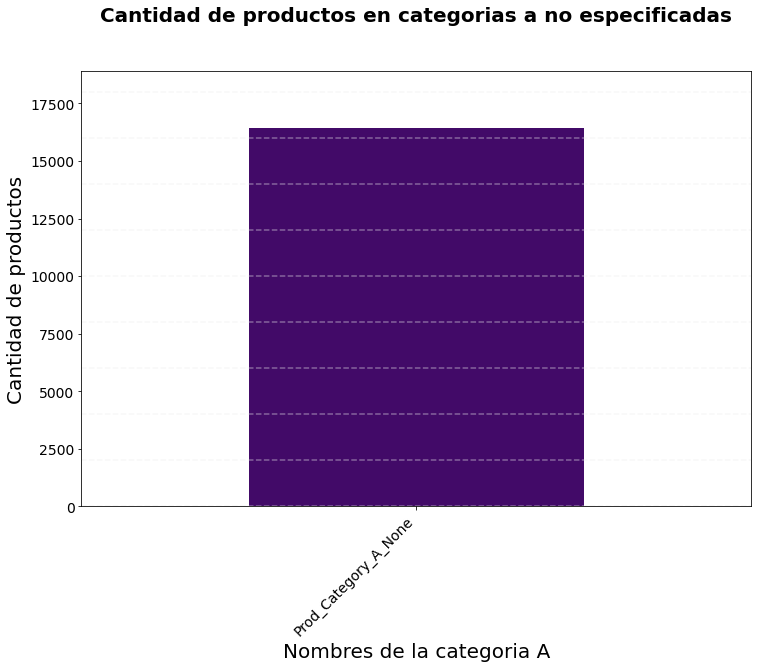

In [ ]:
Grafico_Categoria_a_no_especificada_por_prod_no_especificado = Categoria_a_no_especificada_por_prod_no_especificado['Product_Type'].plot.bar(color = colores, figsize = (12,8),fontsize = 14)
plt.xlabel('Nombres de la categoria A', fontsize = 20)
plt.xticks(rotation=45, ha='right')
lineas = Grafico_Categoria_a_no_especificada_por_prod_no_especificado.get_yticks()
for i in lineas:
      Grafico_Categoria_a_no_especificada_por_prod_no_especificado.axhline(y=i, linestyle='--', alpha=0.4, color='#eeeeee')
plt.ylabel('Cantidad de productos', fontsize = 20) 
plt.title('Cantidad de productos en categorias a no especificadas', fontweight = 'heavy',  fontsize = 20, pad = 50.0)

# **Graficos en general**

In [ ]:
Productos_en_general['Cantidad_productos_especificados'] = Productos_especificados['Product_Type'].count()
Productos_en_general['Cantidad_productos_no_especificados'] = Productos_no_especificados['Product_Type'].count()
Productos_en_general['Total cantidad productos'] = Productos_en_general['Cantidad_productos_especificados'] + Productos_en_general['Cantidad_productos_no_especificados']


In [ ]:
Productos_en_general

,Product_Type,Cantidad_productos_especificados,Cantidad_productos_no_especificados,Total cantidad productos
0,No_especificado,497,16450,16947
1,No_especificado,497,16450,16947
2,No_especificado,497,16450,16947
3,Product_Type_0,497,16450,16947
4,Product_Type_0,497,16450,16947
...,...,...,...,...
16945,No_especificado,497,16450,16947
16946,No_especificado,497,16450,16947
Cantidad_productos_especificados,497,497,16450,16947
Cantidad_productos_no_especificados,16450,497,16450,16947


In [ ]:
Productos_en_general.loc['Cantidad_productos_no_especificados','Product_Type']

16450

Text(0.5, 1.0, 'Tipos de productos')

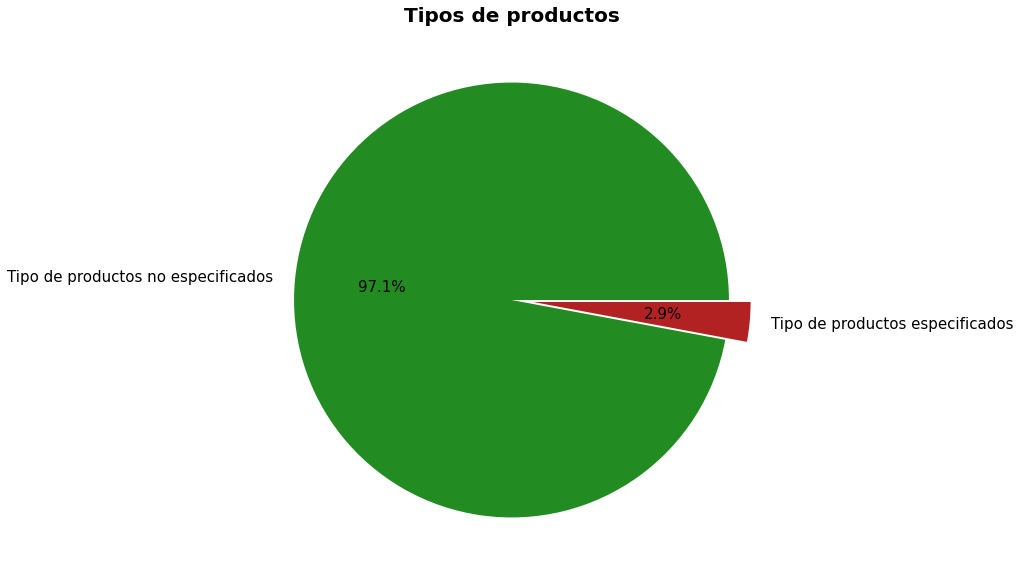

In [ ]:
plt.figure(figsize = (10,10))
plt.pie([Productos_en_general.loc['Cantidad_productos_no_especificados','Product_Type'], Productos_en_general.loc['Cantidad_productos_especificados','Product_Type']], labels = ('Tipo de productos no especificados', 'Tipo de productos especificados'), autopct = '%1.1f%%', colors=('forestgreen','firebrick'), explode = (0, 0.1))
plt.axis('off')
plt.rcParams['font.size'] = 12
plt.title('Tipos de productos', fontweight = 'bold',  fontsize = 20)